In [1]:
import numpy as np
from matplotlib import rc, pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-pastel')
rc('animation', html='html5')


%matplotlib inline



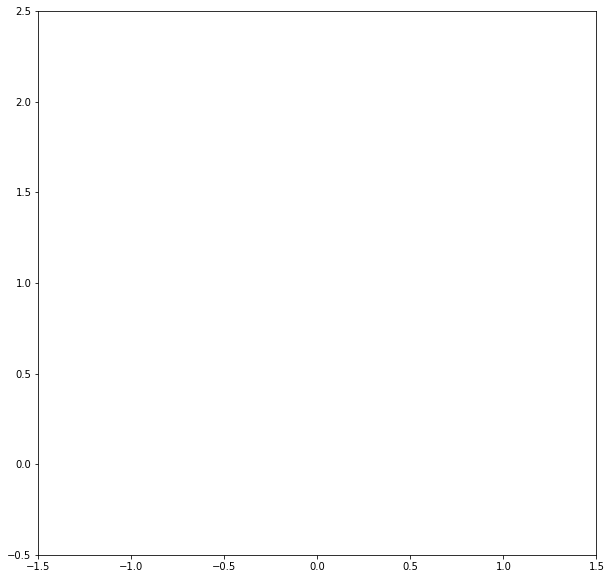

In [2]:

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-0.5, 2.5))
line, = ax.plot([], [], lw=3)

alphas = np.concatenate((np.linspace(0, 10, 100), np.linspace(10,0,100)))
betas = np.concatenate((np.linspace(0, -20, 100), np.linspace(-20,0,100)))




In [3]:
def rot(vector, degrees=None, radians=None):
    if(degrees):
        radians = np.radians(degrees)
    if(radians is None):
        radians = 0
    if(type(vector) == tuple):
        vector = np.array(vector)
    c = np.cos(radians)
    s = np.sin(radians)
    rotmat = np.array([[c, -s],[s,c]])
    return np.matmul(rotmat, vector)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    p1 = np.array([0.,0.])
    p2 = p1 + rot((0.,1.), alphas[i])
    p3 = p2 + rot((0.,1.), betas[i])

    ps = np.array([p1,p2,p3])
    x = ps[:,0]
    y = ps[:,1]
    line.set_data(x,y)
    return line,


In [5]:

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


HTML(anim.to_jshtml())

In [ ]:
anim.save('sine_wave.gif', writer='imagemagick')